Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [177]:
# Read league of legends data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
df = pd.read_csv('../data/league-of-legends/high_diamond_ranked_10min.csv')

In [178]:
# Get Pandas Profiling Report
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True).to_notebook_iframe()

In [179]:
from sklearn.model_selection import train_test_split

def wrangle(X, target):
    """Wrangle train, validate, and test sets in the same way"""

    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # Dropping 'gameId' column due to being unrelated to the outcome of the match
    dropped = ['gameId']
    
    # 'redFirstBlood' is redundant since it will always be the opposite of blueFirstBlood
    dropped.append('redFirstBlood')

    # 'blueDeaths' and 'redDeaths' are redundant since they are the same as 'redKills' and 'blueKills'
    dropped.append('redDeaths')
    dropped.append('blueDeaths')
    
    # 'blueGoldPerMin' and 'redGoldPerMin' are redundant since they are the same as 'blueTotalGold'
    # and 'redTotalGold' divided by 10
    dropped.append('blueGoldPerMin')
    dropped.append('redGoldPerMin')
    
    # 'blueCSPerMin' and 'redCSPerMin' are redundant since they are the same as
    # 'blueTotalMinionsKilled' and 'redblueTotalMinionsKilled' divided by 10
    dropped.append('blueCSPerMin')
    dropped.append('redCSPerMin')
    
    # 'redGoldDiff' is redundant since it will always be the negative of 'blueGoldDiff'
    dropped.append('redGoldDiff')
    
    # 'redExperienceDiff' is redundant since it will always be the negative of 'blueExperienceDiff'
    dropped.append('redExperienceDiff')
    
    X.drop(columns=dropped, inplace=True)
    
    # Split df into train & test. 80/20 split.
    train, test = train_test_split(X, test_size=0.20,
                               stratify=X[target], random_state=42)

    # Split train into train & val. 80/20 split.
    train, val = train_test_split(train, test_size=0.20,
                               stratify=train[target], random_state=42)
    
    # return the wrangled dataframe
    return train, val, test

In [180]:
# Setting target to blueWins
target = 'blueWins'
train, val, test = wrangle(df, target)

In [181]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [182]:
# converting target into a list to find the majority class
# using value_counts(normalize=True) to find the accuracy score
y = y_train.values.tolist()
majority_class = max(set(y), key = y.count)
print(f'Majority Class: {majority_class}')
print(f'Accuracy Score: {y_train.value_counts(normalize=True)[0]:,.2f}')

Majority Class: 0
Accuracy Score: 0.50


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Instantiate model
log = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
) 

# Fit model on training data
log.fit(X_train, y_train)

# Check performance metric (accuracy) on train, validation, and test sets
print('Training Accuracy:', log.score(X_train, y_train))
print('Validating Accuracy:', log.score(X_val, y_val))

Training Accuracy: 0.737266687757039
Validating Accuracy: 0.7235926628716003


In [184]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

lsvc = make_pipeline(
    StandardScaler(), 
    LinearSVC(random_state=42, dual=False)
)

lsvc.fit(X_train, y_train)

print('training accuracy:', lsvc.score(X_train, y_train))
print('validation accuracy:', lsvc.score(X_val, y_val))

training accuracy: 0.7360012654223347
validation accuracy: 0.7229601518026565


In [185]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print('training accuracy:', rf.score(X_train, y_train))
print('validation accuracy:', rf.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.7160025300442757


In [186]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print('training accuracy:', tree.score(X_train, y_train))
print('validation accuracy:', tree.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.6388361796331435


In [187]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_jobs=-1)

eval_set = [(X_train, y_train,
            X_val, y_val)]

xgb.fit(X_train, y_train,
        eval_set=eval_set,
        eval_metric='error',
        early_stopping_rounds=50)

print('training accuracy:', xgb.score(X_train, y_train))
print('validation accuracy:', xgb.score(X_val, y_val))

[0]	validation_0-error:0.24676
Will train until validation_0-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.23663
[2]	validation_0-error:0.22793
[3]	validation_0-error:0.22509
[4]	validation_0-error:0.22319
[5]	validation_0-error:0.22208
[6]	validation_0-error:0.21781
[7]	validation_0-error:0.21654
[8]	validation_0-error:0.21196
[9]	validation_0-error:0.20800
[10]	validation_0-error:0.20658
[11]	validation_0-error:0.20073
[12]	validation_0-error:0.19994
[13]	validation_0-error:0.19804
[14]	validation_0-error:0.19582
[15]	validation_0-error:0.19472
[16]	validation_0-error:0.18649
[17]	validation_0-error:0.18633
[18]	validation_0-error:0.18507
[19]	validation_0-error:0.18412
[20]	validation_0-error:0.18175
[21]	validation_0-error:0.17684
[22]	validation_0-error:0.17700
[23]	validation_0-error:0.17542
[24]	validation_0-error:0.17352
[25]	validation_0-error:0.17352
[26]	validation_0-error:0.16957
[27]	validation_0-error:0.16545
[28]	validation_0-error:0.16324
[29]	validation_

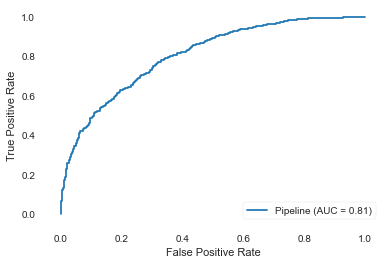

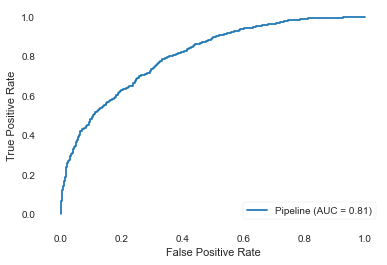

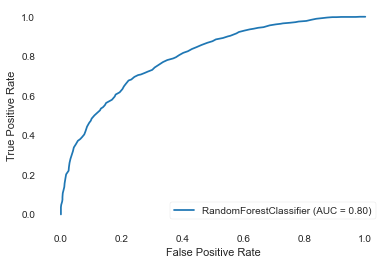

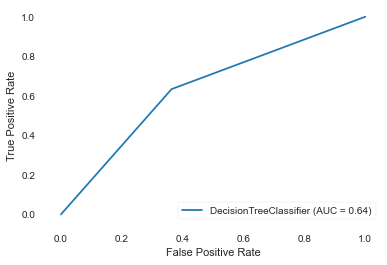

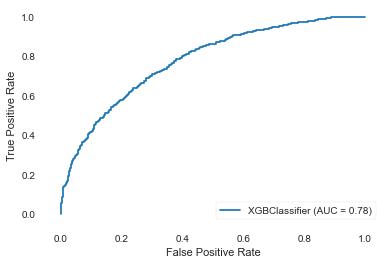

In [188]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log, X_test, y_test)
plot_roc_curve(lsvc, X_test, y_test)
plot_roc_curve(rf, X_test, y_test)
plot_roc_curve(tree, X_test, y_test)
plot_roc_curve(xgb, X_test, y_test)

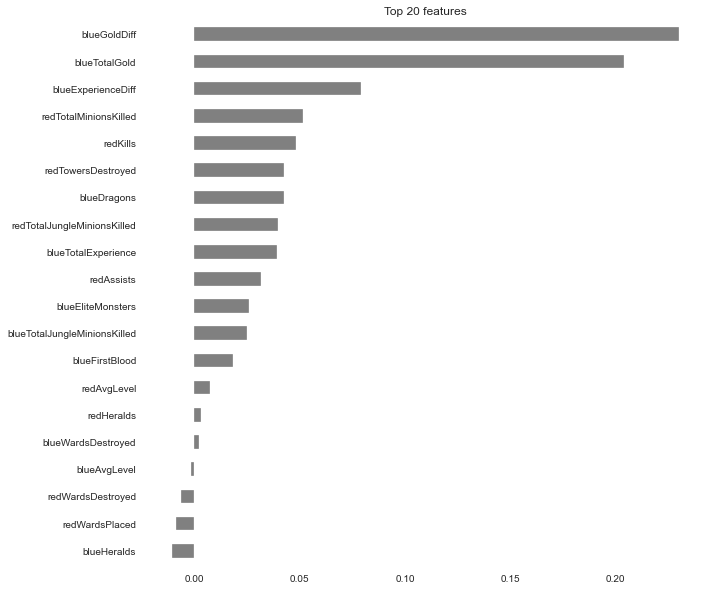

In [189]:
# Get feature importances
svm = lsvc.named_steps['linearsvc']
importances = pd.Series(svm.coef_[0], X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [190]:
feature = 'blueGoldDiff'
X_val[feature].value_counts()

-833     4
-1208    4
 2588    3
-498     3
-736     3
        ..
-1276    1
 3324    1
 1279    1
-3330    1
 0       1
Name: blueGoldDiff, Length: 1442, dtype: int64

In [191]:
X_val_shuffled = X_val.copy()

In [192]:
X_val[feature].head()

9625   -2395
4652    1952
5732   -3983
964     1991
2908    -726
Name: blueGoldDiff, dtype: int64

In [193]:
X_val_shuffled[feature] = np.random.permutation(X_val[feature])

In [194]:
X_val_shuffled[feature].head()

9625   -1189
4652   -4740
5732     166
964    -2553
2908   -1081
Name: blueGoldDiff, dtype: int64

In [195]:
score_with = lsvc.score(X_val, y_val)
score_permuted = lsvc.score(X_val_shuffled, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with blueGoldDiff: 0.7229601518026565
Validation Accuracy with blueGoldDiff permuted: 0.6799493991144845
Permutation Importance: 0.043010752688172005


In [196]:
from sklearn.inspection import permutation_importance

In [197]:
result = permutation_importance(lsvc, X_val, y_val,
                                n_repeats=5, random_state=42)

In [198]:
df = pd.DataFrame({'feature': X_val.columns,
                  'importances_mean': np.round(result['importances_mean'], 3),
                  'importances_std': result['importances_std']})

In [199]:
df.sort_values(by='importances_mean', ascending=False)

,feature,importances_mean,importances_std
14,blueGoldDiff,0.044,0.009334
9,blueTotalGold,0.035,0.005649
24,redTotalGold,0.022,0.003308
26,redTotalExperience,0.004,0.003731
15,blueExperienceDiff,0.004,0.002511
8,blueTowersDestroyed,0.001,0.001833
27,redTotalMinionsKilled,0.001,0.004222
0,blueWardsPlaced,0.001,0.002154
7,blueHeralds,0.001,0.001058
3,blueKills,0.001,0.002094


In [200]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    lsvc,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val, y_val)

PermutationImportance(estimator=Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(dual=False,
                                                           random_state=42))]),
                      random_state=42, scoring='accuracy')

In [201]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.0377 ± 0.0132,blueGoldDiff
0.0300 ± 0.0098,blueTotalGold
0.0278 ± 0.0126,redTotalGold
0.0040 ± 0.0047,redTotalMinionsKilled
0.0029 ± 0.0062,redTotalExperience
0.0024 ± 0.0067,blueExperienceDiff
0.0008 ± 0.0020,redWardsDestroyed
0.0006 ± 0.0023,blueHeralds
0.0001 ± 0.0009,blueWardsPlaced
-0.0000 ± 0.0008,redHeralds
